## Etude des courbes selon la date

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from os import listdir
import matplotlib.pyplot as plt
import imp
import Annex
imp.reload(Annex)

<module 'Annex' from '/home/marques/Documents/Projet_Meteo/Defi/Annex.py'>

In [2]:
X_train,X_test,Y_train,Y_test,X,Y,scaler=Annex.get_data_raw(scale=False, 
                                                        add_dummies=True,
                                                        var_dummies=['ddH10_rose4'],
                                                        TrainTestSplit=True,
                                                        sz_test=0.3,
                                                        impute_method='drop',
                                                        convert_month2int=True,
                                                        date_method='')

We are addressing your request.
Data has been imported. Size: (189280, 31)
Months converted to int.
Dummies added.
26528 data points deleted. 14.02 %
Train size: 113926, Test size: 48826


In [3]:
Xtot=pd.concat([X,Y], axis=1)
Xtot.shape

(162752, 34)

#### Objectif : tracer la courbe de température pour une journée donnée dans un lieu insee donné. 

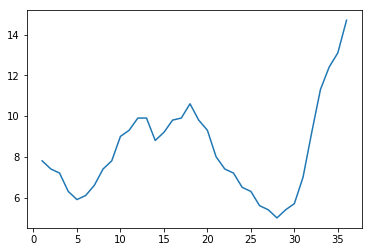

In [11]:
i=162751
Xdate=Xtot.loc[Xtot['date'] == Xtot.date.iloc[i]]
Xdate=Xdate.loc[Xdate['insee'] == Xtot.insee.iloc[i]]
plt.plot(Xdate['ech'],Xdate['tH2_obs'])
plt.show()